# 📋 Table of Contents / Index


## 🔍 Basic Data Analysis
- [Description of individual columns in the data](#description)
- [Loading required libraries](#loading-libraries) 
- [Basic information about the dataframe](#zakladni-informace-o-datovem-ramci)
- [Outliers](#odstraneni)



## 🎯 Risk Modeling
- [Proposal of rejection criteria for approval](#8-navrh-zamitacich-kriterii-pro-schvalovani)
- [Visualization of CNT_REJECTED and NUM_DAYS_CREDIT_HISTORY](#3d-vizualizace-target-rate-podle-cnt_rejected-a-num_days_credit_history-max-z-hodnota-02-s-legendou)
- [Data enrichment with a new attribute from ZIP code](#9-obohaceni-dat-o-novy-atribut-z-psc)


## 🤖 Advanced Modeling
- [Recommendation of a mathematical model for TARGET prediction](#10-doporuceni-matematickeho-modelu-pro-predikci-target)
- [Evaluation of logistic regression assumptions: Box-Tidwell test and VIF](#vyhodnoceni-predpokladu-logisticke-regrese-box-tidwell-test-a-vif)
- [Data transformation to resolve violated linearity](#transformace-dat)
- [Advanced variable transformations](#pokrocile-transformace)
- [Model comparison: original vs. transformed data](#porovnani-modelu)
- [Extended evaluation with confusion matrix and confidence intervals](#rozsirene-vyhodnoceni)


## 📈 Advanced Analysis and Validation
- [Cross-validation](#cross-validation)
- [Logistic model coefficients](#koeficienty-logistickeho-modelu)
- [Model evaluation using lift curve and Sommers' D](#vyhodnoceni-modelu-pomoci-lift-krivky-a-sommersova-d)
- [Evaluation of metrics](#vyhodnoceni-metrik)
- [Residual plots for model evaluation](#rezidualni-grafy-pro-vyhodnoceni-modelu)
- [Visualization of variable importance (Feature Importance)](#vizualizace-vyznamu-promennych-feature-importance-pro-jednotlive-modely)


---


**📌 Notes:**
- All links are functional and lead to the appropriate sections
- The analysis includes statistical tests (Box-Tidwell, VIF), data transformations, and advanced modeling
- Contains a complete model comparison with confidence intervals and odds ratios
- Implements cross-validation for robust evaluation

# Analysis of Approved Cash Loan Data


This notebook contains a complete analysis of the dataset on approved cash loans according to the assigned tasks. Each step is thoroughly commented.


### Literature: 
Hastie, T., Tibshirani, R., & Friedman, J. (2010). *The elements of statistical learning: Data mining, inference, and prediction* (2nd ed., p. 119). Springer.
https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf

An investigation of estimation performance for a multivariate Poisson-gamma model with parameter dependency. Schwarzenegger, R., 2023. *Thesis*. University of Strathclyde, p. 96.

Logistic Regression Classifier Tutorial, *Kaggle*. Banerjee, P., 2019. Available at: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial (Accessed: 17 July 2025).


### Models Used:


**Logistic Regression** models the probability of an event (e.g., problematic loan) using the logit transformation:


$$


\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_k x_k


$$


where:


- $( p )$ is the probability that $( \text{TARGET} = 1 )$


- $( x_1, x_2, \ldots, x_k )$ are input variables (e.g., income, age, number of rejections, etc.)


- $( \beta_0 )$ is the constant (intercept)


- $( \beta_1, \ldots, \beta_k )$ are the model coefficients.


**Random Forest** is an ensemble method that combines multiple decision trees for classification or regression. The final prediction is given by voting (classification) or averaging (regression) the outputs of individual trees:


$$


\hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(x)


$$


where:


- $( \hat{y} )$ is the predicted value (probability or result)


- $( N )$ is the number of trees in the forest


- $( T_i(x) )$ is the prediction of the i-th tree for the input vector $( x )$


**XGBoost** is a gradient boosting method that combines many weak models (decision trees) into a strong predictor. Each new tree learns to correct the errors of previous trees:


$$


\hat{y} = \sum_{m=1}^{M} f_m(x), \quad f_m \in \mathcal{F}


$$


where:


- $( \hat{y} )$ is the predicted value (probability or result)


- $( M )$ is the number of trees (iterations)


- $( f_m(x) )$ is the prediction of the m-th tree for the input vector $( x )$


- $( \mathcal{F} )$ is the set of all

## Description of Individual Columns in the Dataset

<a id="description"></a>

The dataset is a merged combination of **application records** and **credit history records** from Kaggle's "Credit Card Approval Prediction" dataset. Here is the explanation of each column:

### **Applicant Information**
- **ID**: Unique identifier for each applicant
- **CODE_GENDER**: Applicant's gender (M = Male, F = Female)
- **AGE**: Applicant's age in years (calculated from DAYS_BIRTH)
- **CNT_CHILDREN**: Number of children the applicant has
- **CNT_FAM_MEMBERS**: Total number of family members

### **Financial Information**
- **AMT_INCOME_TOTAL**: Applicant's total annual income
- **NAME_INCOME_TYPE**: Type of income source (Working, Commercial associate, Pensioner, State servant, Student)
- **DAYS_EMPLOYED**: Number of days the applicant has been employed (negative values = normal, positive values = data errors that were cleaned)

### **Personal Background**
- **NAME_EDUCATION_TYPE**: Highest level of education completed
- **NAME_FAMILY_STATUS**: Marital status (Single, Married, Civil marriage, Widow, Separated)
- **NAME_HOUSING_TYPE**: Type of housing (House/apartment, With parents, Municipal apartment, Rented apartment, Office apartment, Co-op apartment)
- **OCCUPATION_TYPE**: Applicant's occupation (many categories, some missing values)

### **Assets & Property**
- **FLAG_OWN_CAR**: Whether the applicant owns a car (Y = Yes, N = No)
- **FLAG_OWN_REALTY**: Whether the applicant owns real estate property (Y = Yes, N = No)

### **Contact Information**
- **FLAG_MOBIL**: Whether the applicant provided a mobile phone number (1 = Yes, 0 = No)
- **FLAG_WORK_PHONE**: Whether the applicant provided a work phone number (1 = Yes, 0 = No)
- **FLAG_PHONE**: Whether the applicant provided a home phone number (1 = Yes, 0 = No)
- **FLAG_EMAIL**: Whether the applicant provided an email address (1 = Yes, 0 = No)

### **Temporal Information**
- **DAYS_BIRTH**: Number of days before the application when the applicant was born (negative value)

### **Target Variable**
- **TARGET**: **Credit risk indicator** (created from credit payment history)
  - **0 = Good client**: No serious payment delays (never had 60+ days past due)
  - **1 = Bad client**: Had serious payment issues (60+ days past due at some point)

---

**📊 Dataset Summary:**
- **Source**: Kaggle Credit Card Approval Prediction dataset (merged application + credit records)
- **Total Records**: 30,322 (after outlier cleaning)
- **Features**: 20 columns (19 features + 1 target)
- **Target Distribution**: 98.3% good clients, 1.7% bad clients
- **Missing Values**: Only in OCCUPATION_TYPE column

In [1]:
# Loading required libraries
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
import statsmodels.api as sm  # Statistical modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF analysis
from sklearn.preprocessing import StandardScaler  # Data standardization
from sklearn.linear_model import LogisticRegression  # Logistic regression
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score  # Metrics

In [2]:
import kagglehub
import os
import numpy as np

# Download latest version
path = kagglehub.dataset_download("rikdifos/credit-card-approval-prediction")

print("Path to dataset files:", path)

# Load both CSV files
app_df = pd.read_csv(os.path.join(path, 'application_record.csv'))
credit_df = pd.read_csv(os.path.join(path, 'credit_record.csv'))

print(f"Application records shape: {app_df.shape}")
print(f"Credit records shape: {credit_df.shape}")

# Create target variable from credit history
# STATUS meanings: 'C' = Closed, 'X' = No loan, '0' = 1-29 days past due, 
# '1' = 30-59 days past due, '2' = 60-89 days past due, etc.
# We'll define 'bad' clients as those who had 2+ months past due (STATUS >= '2')

print("\nUnique STATUS values in credit_df:")
print(sorted(credit_df['STATUS'].unique()))

# Create a target variable: 1 if client had serious payment issues (STATUS >= '2'), 0 otherwise
credit_summary = credit_df.groupby('ID').agg({
    'STATUS': lambda x: 1 if any(s in ['2', '3', '4', '5'] for s in x) else 0
}).reset_index()
credit_summary.columns = ['ID', 'TARGET']

print(f"\nCreated target variable from credit history:")
print(f"Good clients (0): {(credit_summary['TARGET'] == 0).sum()}")
print(f"Bad clients (1): {(credit_summary['TARGET'] == 1).sum()}")

# Merge application data with target variable
df = app_df.merge(credit_summary, on='ID', how='inner')

print(f"\nMerged dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display sample of merged data
print(f"\nSample of merged data:")
print(df[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'TARGET']].head())

# Check target distribution
print(f"\nTarget distribution:")
print(df['TARGET'].value_counts())

df.head()

Path to dataset files: C:\Users\Rafael\.cache\kagglehub\datasets\rikdifos\credit-card-approval-prediction\versions\3
Application records shape: (438557, 18)
Credit records shape: (1048575, 3)

Unique STATUS values in credit_df:
['0', '1', '2', '3', '4', '5', 'C', 'X']

Created target variable from credit history:
Good clients (0): 45318
Bad clients (1): 667

Merged dataset shape: (36457, 19)
Columns: ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'TARGET']

Sample of merged data:
        ID CODE_GENDER  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0  5008804           M          427500.0               Higher education   
1  5008805           M          427500.0               Higher education   
2  5008806           M      

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [3]:
# Basic information about the dataframe
print('Number of rows:', len(df))
print('Number of columns:', len(df.columns))
print('\nNumber of missing values in each column (only nonzero):')
missing = df.isnull().sum()
print(missing[missing > 0])

Number of rows: 36457
Number of columns: 19

Number of missing values in each column (only nonzero):
OCCUPATION_TYPE    11323
dtype: int64


## Basic Information about the Dataframe


<a id="zakladni-informace-o-datovem-ramci"></a>


First, we will display basic information about the data - number of rows, columns, and missing values.

In [4]:
# Statistics for numerical columns
print('\nDescriptive statistics for numerical columns:')
print(df.describe().T)


# Statistics for categorical columns
print('\nStatistics for categorical columns:')
categorical = df.select_dtypes(include=['object'])
for col in categorical.columns:
    print(f'\n{col}:')
    print('Number of unique values:', categorical[col].nunique())
    print('Most frequent values:')
    print(categorical[col].value_counts().head())


# Statistics for the target variable (TARGET)
if 'TARGET' in df.columns:
    print('\nDistribution of the target variable TARGET:')
    print(df['TARGET'].value_counts())
    print('Target rate:', df['TARGET'].mean())


Descriptive statistics for numerical columns:
                    count          mean            std        min        25%  \
ID                36457.0  5.078227e+06   41875.240788  5008804.0  5042028.0   
CNT_CHILDREN      36457.0  4.303152e-01       0.742367        0.0        0.0   
AMT_INCOME_TOTAL  36457.0  1.866857e+05  101789.226482    27000.0   121500.0   
DAYS_BIRTH        36457.0 -1.597517e+04    4200.549944   -25152.0   -19438.0   
DAYS_EMPLOYED     36457.0  5.926294e+04  137651.334859   -15713.0    -3153.0   
FLAG_MOBIL        36457.0  1.000000e+00       0.000000        1.0        1.0   
FLAG_WORK_PHONE   36457.0  2.255260e-01       0.417934        0.0        0.0   
FLAG_PHONE        36457.0  2.948131e-01       0.455965        0.0        0.0   
FLAG_EMAIL        36457.0  8.972214e-02       0.285787        0.0        0.0   
CNT_FAM_MEMBERS   36457.0  2.198453e+00       0.911686        1.0        2.0   
TARGET            36457.0  1.689662e-02       0.128886        0.0        

## Outliers


<a id=odstraneni></a>


Outliers are extreme values that can distort analysis results. In this dataset, *AMT_NET_INCOME* and *NUM_DAYS_CREDIT_HISTORY* are such variables.

In [5]:
# Comprehensive Outlier Detection and Handling
import numpy as np
from scipy import stats

print("=== OUTLIER ANALYSIS ===")
print(f"Original dataset shape: {df.shape}")

# Save original dataset for comparison
df_original = df.copy()

# 1. INCOME OUTLIERS (AMT_INCOME_TOTAL)
print(f"\n1. INCOME OUTLIERS:")
income_q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
income_q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
income_iqr = income_q3 - income_q1
income_lower = income_q1 - 1.5 * income_iqr
income_upper = income_q3 + 1.5 * income_iqr

income_outliers = df[(df['AMT_INCOME_TOTAL'] < income_lower) | (df['AMT_INCOME_TOTAL'] > income_upper)]
print(f"  Income range: {df['AMT_INCOME_TOTAL'].min():,.0f} - {df['AMT_INCOME_TOTAL'].max():,.0f}")
print(f"  IQR bounds: {income_lower:,.0f} - {income_upper:,.0f}")
print(f"  Outliers found: {len(income_outliers)} ({len(income_outliers)/len(df)*100:.2f}%)")

# 2. EMPLOYMENT OUTLIERS (DAYS_EMPLOYED)
print(f"\n2. EMPLOYMENT HISTORY OUTLIERS:")
# DAYS_EMPLOYED has some extreme positive values which are data quality issues
employment_outliers = df[df['DAYS_EMPLOYED'] > 0]
print(f"  Employment days range: {df['DAYS_EMPLOYED'].min():,.0f} - {df['DAYS_EMPLOYED'].max():,.0f}")
print(f"  Positive values (data errors): {len(employment_outliers)} ({len(employment_outliers)/len(df)*100:.2f}%)")

# For negative values (normal employment), check for unrealistic employment periods
employment_normal = df[df['DAYS_EMPLOYED'] <= 0]
employment_q1 = employment_normal['DAYS_EMPLOYED'].quantile(0.25)
employment_q3 = employment_normal['DAYS_EMPLOYED'].quantile(0.75)
employment_iqr = employment_q3 - employment_q1
employment_lower = employment_q1 - 1.5 * employment_iqr # IQR rule
employment_upper = employment_q3 + 1.5 * employment_iqr

# 3. AGE OUTLIERS (calculate age first)
df['AGE'] = (-df['DAYS_BIRTH'] / 365.25).round().astype(int)
print(f"\n3. AGE OUTLIERS:")
age_outliers = df[(df['AGE'] < 18) | (df['AGE'] > 100)]
print(f"  Age range: {df['AGE'].min()} - {df['AGE'].max()} years")
print(f"  Unrealistic ages: {len(age_outliers)} ({len(age_outliers)/len(df)*100:.2f}%)")

# 4. FAMILY SIZE OUTLIERS
print(f"\n4. FAMILY SIZE OUTLIERS:")
family_outliers = df[df['CNT_FAM_MEMBERS'] > 10]
print(f"  Family members range: {df['CNT_FAM_MEMBERS'].min()} - {df['CNT_FAM_MEMBERS'].max()}")
print(f"  Large families (>10): {len(family_outliers)} ({len(family_outliers)/len(df)*100:.2f}%)")

# OUTLIER REMOVAL STRATEGY
print(f"\n=== OUTLIER REMOVAL ===")

# Remove data quality issues (definite errors)
df_clean = df.copy()

# 1. Remove extreme employment outliers (positive values are data errors)
before_employment = len(df_clean)
df_clean = df_clean[df_clean['DAYS_EMPLOYED'] <= 0]
employment_removed = before_employment - len(df_clean)
print(f"1. Removed {employment_removed} records with positive DAYS_EMPLOYED")

# 2. Remove unrealistic ages
before_age = len(df_clean)
df_clean = df_clean[(df_clean['AGE'] >= 18) & (df_clean['AGE'] <= 100)]
age_removed = before_age - len(df_clean)
print(f"2. Removed {age_removed} records with unrealistic ages")

# 3. Cap extreme income outliers (instead of removing, to preserve data)
before_income = len(df_clean)
income_99th = df_clean['AMT_INCOME_TOTAL'].quantile(0.99)
df_clean.loc[df_clean['AMT_INCOME_TOTAL'] > income_99th, 'AMT_INCOME_TOTAL'] = income_99th
income_capped = (df_clean['AMT_INCOME_TOTAL'] == income_99th).sum()
print(f"3. Capped {income_capped} extreme income values at 99th percentile ({income_99th:,.0f})")

# 4. Handle extreme employment history for negative values
employment_1st = df_clean['DAYS_EMPLOYED'].quantile(0.01)
df_clean.loc[df_clean['DAYS_EMPLOYED'] < employment_1st, 'DAYS_EMPLOYED'] = employment_1st
employment_capped = (df_clean['DAYS_EMPLOYED'] == employment_1st).sum()
print(f"4. Capped {employment_capped} extreme employment history values at 1st percentile ({employment_1st:,.0f})")

print(f"\n=== SUMMARY ===")
print(f"Original shape: {df_original.shape}")
print(f"After outlier handling: {df_clean.shape}")
print(f"Total records removed: {len(df_original) - len(df_clean)} ({(len(df_original) - len(df_clean))/len(df_original)*100:.2f}%)")
print(f"Target distribution preserved: {df_clean['TARGET'].value_counts().to_dict()}")

# Update the main dataframe
df = df_clean.copy()

# Show impact on key statistics
print(f"\n=== IMPACT ON KEY STATISTICS ===")
for col in ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AGE']:
    if col in df_original.columns and col in df.columns:
        print(f"{col}:")
        print(f"  Before: mean={df_original[col].mean():.1f}, std={df_original[col].std():.1f}")
        print(f"  After:  mean={df[col].mean():.1f}, std={df[col].std():.1f}")
        print(f"  Change: {((df[col].mean() - df_original[col].mean())/df_original[col].mean()*100):+.2f}% mean, {((df[col].std() - df_original[col].std())/df_original[col].std()*100):+.2f}% std")

=== OUTLIER ANALYSIS ===
Original dataset shape: (36457, 19)

1. INCOME OUTLIERS:
  Income range: 27,000 - 1,575,000
  IQR bounds: -33,750 - 380,250
  Outliers found: 1529 (4.19%)

2. EMPLOYMENT HISTORY OUTLIERS:
  Employment days range: -15,713 - 365,243
  Positive values (data errors): 6135 (16.83%)

3. AGE OUTLIERS:
  Age range: 21 - 69 years
  Unrealistic ages: 0 (0.00%)

4. FAMILY SIZE OUTLIERS:
  Family members range: 1.0 - 20.0
  Large families (>10): 4 (0.01%)

=== OUTLIER REMOVAL ===
1. Removed 6135 records with positive DAYS_EMPLOYED
2. Removed 0 records with unrealistic ages
3. Capped 311 extreme income values at 99th percentile (585,000)
4. Capped 309 extreme employment history values at 1st percentile (-10,993)

=== SUMMARY ===
Original shape: (36457, 19)
After outlier handling: (30322, 20)
Total records removed: 6135 (16.83%)
Target distribution preserved: {0: 29819, 1: 503}

=== IMPACT ON KEY STATISTICS ===
AMT_INCOME_TOTAL:
  Before: mean=186685.7, std=101789.2
  After:

=== POST-OUTLIER EXPLORATORY DATA ANALYSIS ===
Clean dataset shape: (30322, 20)
Target distribution: {0: 29819, 1: 503}

=== CORRELATION ANALYSIS ===
Numerical columns: ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'TARGET', 'AGE']

Correlations with TARGET (sorted by absolute value):
  DAYS_EMPLOYED: 0.0250
  ID: 0.0160
  FLAG_WORK_PHONE: 0.0079
  AGE: -0.0077
  DAYS_BIRTH: 0.0074
  FLAG_EMAIL: -0.0032
  AMT_INCOME_TOTAL: 0.0032
  FLAG_PHONE: 0.0028
  CNT_CHILDREN: 0.0016
  CNT_FAM_MEMBERS: -0.0013
  FLAG_MOBIL: nan


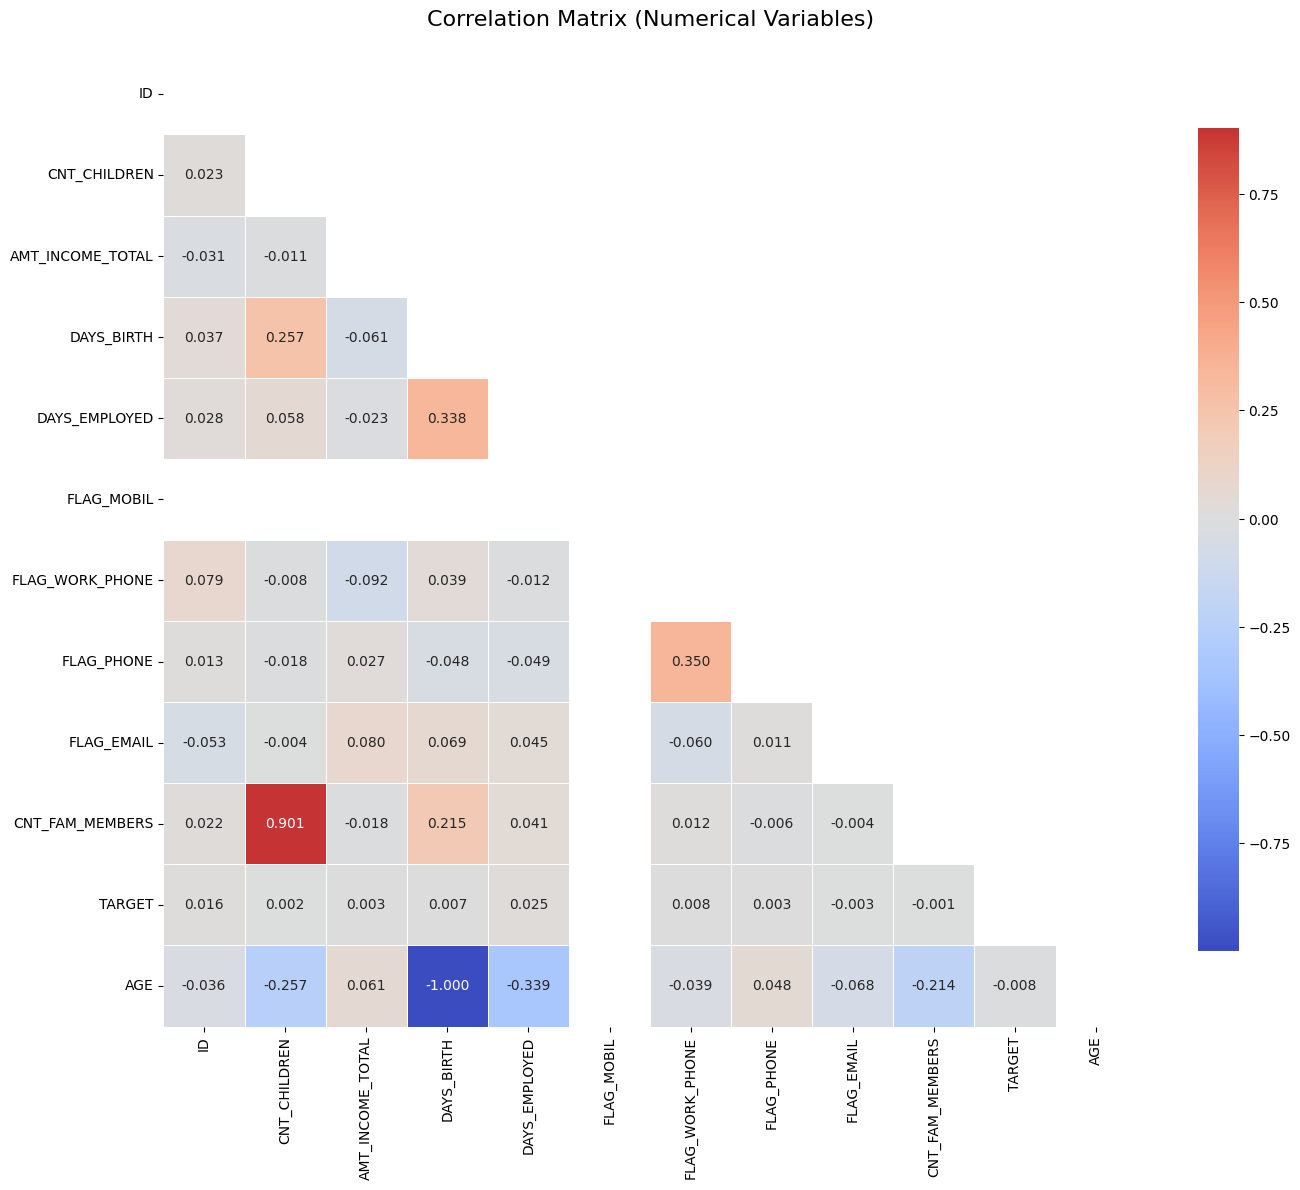


=== CATEGORICAL VARIABLE ANALYSIS ===
Categorical columns: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

CODE_GENDER:
  Unique values: 2
  Most common: {'F': 19195, 'M': 11127}
  Target rates by category:
             Count  Target_Rate
CODE_GENDER                    
F            19195       0.0148
M            11127       0.0197

FLAG_OWN_CAR:
  Unique values: 2
  Most common: {'N': 17766, 'Y': 12556}
  Target rates by category:
              Count  Target_Rate
FLAG_OWN_CAR                    
N             17766       0.0167
Y             12556       0.0165

FLAG_OWN_REALTY:
  Unique values: 2
  Most common: {'Y': 19786, 'N': 10536}
  Target rates by category:
                 Count  Target_Rate
FLAG_OWN_REALTY                    
N                10536       0.0198
Y                19786       0.0149

NAME_INCOME_TYPE:
  Unique values: 5
  Most common: {'Working': 18819, 

In [6]:
# Post-Outlier Exploratory Data Analysis
print("=== POST-OUTLIER EXPLORATORY DATA ANALYSIS ===")
print(f"Clean dataset shape: {df.shape}")
print(f"Target distribution: {df['TARGET'].value_counts().to_dict()}")

# 1. CORRELATION ANALYSIS
print(f"\n=== CORRELATION ANALYSIS ===")

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Show correlations with TARGET
target_corr = corr_matrix['TARGET'].sort_values(key=abs, ascending=False)
print(f"\nCorrelations with TARGET (sorted by absolute value):")
for col, corr in target_corr.items():
    if col != 'TARGET':
        print(f"  {col}: {corr:.4f}")

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f')
plt.title('Correlation Matrix (Numerical Variables)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 2. CATEGORICAL VARIABLE ANALYSIS
print(f"\n=== CATEGORICAL VARIABLE ANALYSIS ===")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'TARGET' in categorical_cols:
    categorical_cols.remove('TARGET')

print(f"Categorical columns: {categorical_cols}")

# Analyze each categorical variable
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"  Unique values: {len(value_counts)}")
    print(f"  Most common: {value_counts.head(3).to_dict()}")
    
    # Target rate by category
    if len(value_counts) <= 10:  # Only for variables with reasonable number of categories
        target_rate = df.groupby(col)['TARGET'].agg(['count', 'mean']).round(4)
        target_rate.columns = ['Count', 'Target_Rate']
        print(f"  Target rates by category:")
        print(target_rate.head())

# 3. KEY INSIGHTS SUMMARY
print(f"\n=== KEY INSIGHTS SUMMARY ===")

# Age insights
age_stats = df.groupby('TARGET')['AGE'].agg(['mean', 'median', 'std']).round(2)
print(f"Age by target:")
print(age_stats)

# Income insights
income_stats = df.groupby('TARGET')['AMT_INCOME_TOTAL'].agg(['mean', 'median', 'std']).round(0)
print(f"\nIncome by target:")
print(income_stats)

# Employment insights
employment_stats = df.groupby('TARGET')['DAYS_EMPLOYED'].agg(['mean', 'median', 'std']).round(0)
print(f"\nEmployment history by target:")
print(employment_stats)

# Family insights
family_stats = df.groupby('TARGET')[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].mean().round(2)
print(f"\nFamily structure by target:")
print(family_stats)

In [7]:
# Feature Engineering
# remove DAYS_BIRTH as it is redundant with AGE
if 'DAYS_BIRTH' in df.columns:
    df.drop(columns=['DAYS_BIRTH'], inplace=True)

print("=== FEATURE ENGINEERING ===")

# Create new features that might be predictive
df_features = df.copy()


# 1. INCOME-BASED FEATURES
# Income per family member
df_features['INCOME_PER_FAMILY_MEMBER'] = df_features['AMT_INCOME_TOTAL'] / df_features['CNT_FAM_MEMBERS']

# Income categories
df_features['INCOME_LEVEL'] = pd.cut(df_features['AMT_INCOME_TOTAL'], 
                                   bins=[0, 100000, 200000, 300000, float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Very_High'])

# 2. AGE-BASED FEATURES
df_features['AGE_GROUP'] = pd.cut(df_features['AGE'], 
                                bins=[0, 30, 40, 50, 60, 100],
                                labels=['Young', 'Early_Career', 'Mid_Career', 'Senior', 'Retirement'])

# Years employed (convert days to years)
df_features['YEARS_EMPLOYED'] = (-df_features['DAYS_EMPLOYED'] / 365.25).round(2)

# Employment stability categories
df_features['EMPLOYMENT_STABILITY'] = pd.cut(df_features['YEARS_EMPLOYED'],
                                           bins=[0, 1, 5, 10, float('inf')],
                                           labels=['New', 'Short_Term', 'Stable', 'Very_Stable'])

# 3. FAMILY-BASED FEATURES
# Has children flag
df_features['HAS_CHILDREN'] = (df_features['CNT_CHILDREN'] > 0).astype(int)

# Large family flag
df_features['LARGE_FAMILY'] = (df_features['CNT_FAM_MEMBERS'] > 4).astype(int)

# 4. CONTACT INFORMATION SCORE
# Create a contact completeness score (0-4)
contact_cols = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df_features['CONTACT_SCORE'] = df_features[contact_cols].sum(axis=1)

# 5. ASSET OWNERSHIP SCORE
# Combine car and realty ownership
df_features['OWN_CAR_BINARY'] = (df_features['FLAG_OWN_CAR'] == 'Y').astype(int)
df_features['OWN_REALTY_BINARY'] = (df_features['FLAG_OWN_REALTY'] == 'Y').astype(int)
df_features['ASSET_SCORE'] = df_features['OWN_CAR_BINARY'] + df_features['OWN_REALTY_BINARY']

# 6. RISK INDICATORS
# Income vs Age ratio (financial maturity indicator)
df_features['INCOME_AGE_RATIO'] = df_features['AMT_INCOME_TOTAL'] / df_features['AGE']

# REMOVE DAYS_BIRTH

# Employment vs Age ratio (career progress indicator)  
df_features['EMPLOYMENT_AGE_RATIO'] = df_features['YEARS_EMPLOYED'] / df_features['AGE']

print(f"Original features: {df.shape[1]}")
print(f"After feature engineering: {df_features.shape[1]}")
print(f"New features created: {df_features.shape[1] - df.shape[1]}")

# Display new features
new_features = [col for col in df_features.columns if col not in df.columns]
print(f"\nNew features created:")
for i, feature in enumerate(new_features, 1):
    print(f"{i:2d}. {feature}")

# Show sample of new features
print(f"\nSample of new features:")
sample_cols = ['AGE', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'INCOME_PER_FAMILY_MEMBER', 
               'INCOME_LEVEL', 'AGE_GROUP', 'YEARS_EMPLOYED', 'EMPLOYMENT_STABILITY', 
               'CONTACT_SCORE', 'ASSET_SCORE', 'TARGET']
print(df_features[sample_cols].head())

# Update main dataframe
df = df_features.copy()
print(f"\nDataset updated with engineered features.")

=== FEATURE ENGINEERING ===
Original features: 19
After feature engineering: 32
New features created: 13

New features created:
 1. INCOME_PER_FAMILY_MEMBER
 2. INCOME_LEVEL
 3. AGE_GROUP
 4. YEARS_EMPLOYED
 5. EMPLOYMENT_STABILITY
 6. HAS_CHILDREN
 7. LARGE_FAMILY
 8. CONTACT_SCORE
 9. OWN_CAR_BINARY
10. OWN_REALTY_BINARY
11. ASSET_SCORE
12. INCOME_AGE_RATIO
13. EMPLOYMENT_AGE_RATIO

Sample of new features:
   AGE  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  INCOME_PER_FAMILY_MEMBER  \
0   33          427500.0              2.0                  213750.0   
1   33          427500.0              2.0                  213750.0   
2   59          112500.0              2.0                   56250.0   
3   52          270000.0              1.0                  270000.0   
4   52          270000.0              1.0                  270000.0   

  INCOME_LEVEL     AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_STABILITY  \
0    Very_High  Early_Career           12.44          Very_Stable   
1    Very_High  Early_C

In [8]:
# Model Preparation and Training
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import xgboost as xgb

print("=== MODEL PREPARATION ===")

# Prepare features for modeling
df_model = df.copy()

# Handle categorical variables
categorical_features = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
if 'TARGET' in categorical_features:
    categorical_features.remove('TARGET')

print(f"Categorical features to encode: {categorical_features}")

# Label encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    # Convert to string and handle missing values properly
    col_data = df_model[col].astype(str)
    col_data = col_data.replace('nan', 'Missing')
    col_data = col_data.fillna('Missing')
    
    df_model[col + '_encoded'] = le.fit_transform(col_data)
    label_encoders[col] = le

# Select features for modeling
# Exclude original categorical columns and keep encoded versions
feature_cols = [col for col in df_model.columns if col not in categorical_features + ['TARGET', 'ID']]
print(f"\nFeatures for modeling ({len(feature_cols)}): {feature_cols}")

X = df_model[feature_cols]
y = df_model['TARGET']

# Handle any remaining missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

print(f"\nDataset for modeling:")
print(f"Features shape: {X_imputed.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape}, Target: {y_train.value_counts().to_dict()}")
print(f"Test set: {X_test.shape}, Target: {y_test.value_counts().to_dict()}")

# Scale features for algorithms that need it
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

print("=== MODEL TRAINING ===")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced', max_depth=10),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression, original for tree-based models
    if name == 'Logistic Regression':
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Train model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    
    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_auc = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='roc_auc')
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'auc_score': auc_score,
        'cv_auc_mean': cv_auc.mean(),
        'cv_auc_std': cv_auc.std()
    }
    
    print(f"  Test AUC: {auc_score:.4f}")
    print(f"  CV AUC: {cv_auc.mean():.4f} (+/- {cv_auc.std() * 2:.4f})")

# Model comparison
print("\n=== MODEL COMPARISON ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_AUC': [results[name]['auc_score'] for name in results.keys()],
    'CV_AUC_Mean': [results[name]['cv_auc_mean'] for name in results.keys()],
    'CV_AUC_Std': [results[name]['cv_auc_std'] for name in results.keys()]
}).sort_values('Test_AUC', ascending=False)

print(comparison_df)

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

# Store best model results for detailed evaluation
best_results = results[best_model_name]

=== MODEL PREPARATION ===
Categorical features to encode: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'INCOME_LEVEL', 'AGE_GROUP', 'EMPLOYMENT_STABILITY']

Features for modeling (30): ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE', 'INCOME_PER_FAMILY_MEMBER', 'YEARS_EMPLOYED', 'HAS_CHILDREN', 'LARGE_FAMILY', 'CONTACT_SCORE', 'OWN_CAR_BINARY', 'OWN_REALTY_BINARY', 'ASSET_SCORE', 'INCOME_AGE_RATIO', 'EMPLOYMENT_AGE_RATIO', 'CODE_GENDER_encoded', 'FLAG_OWN_CAR_encoded', 'FLAG_OWN_REALTY_encoded', 'NAME_INCOME_TYPE_encoded', 'NAME_EDUCATION_TYPE_encoded', 'NAME_FAMILY_STATUS_encoded', 'NAME_HOUSING_TYPE_encoded', 'OCCUPATION_TYPE_encoded', 'INCOME_LEVEL_encoded', 'AGE_GROUP_encoded', 'EMPLOYMENT_STABILITY_encoded']

Dataset for modeling:
Features shape: (30322, 30)
Target distribution: {0

=== DETAILED MODEL EVALUATION ===
Best Model: Random Forest
AUC Score: 0.7610

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5964
           1       0.21      0.38      0.27       101

    accuracy                           0.97      6065
   macro avg       0.60      0.68      0.63      6065
weighted avg       0.98      0.97      0.97      6065


Confusion Matrix:
[[5825  139]
 [  63   38]]

Detailed Metrics:
True Negatives: 5825
False Positives: 139
False Negatives: 63
True Positives: 38
Precision: 0.2147
Recall: 0.3762
F1-Score: 0.2734

Top 10 Most Important Features:
 1. EMPLOYMENT_AGE_RATIO: 0.1057
 2. INCOME_AGE_RATIO: 0.1004
 3. YEARS_EMPLOYED: 0.1003
 4. DAYS_EMPLOYED: 0.0996
 5. AGE: 0.0850
 6. INCOME_PER_FAMILY_MEMBER: 0.0761
 7. AMT_INCOME_TOTAL: 0.0669
 8. OCCUPATION_TYPE_encoded: 0.0586
 9. NAME_INCOME_TYPE_encoded: 0.0229
10. AGE_GROUP_encoded: 0.0225


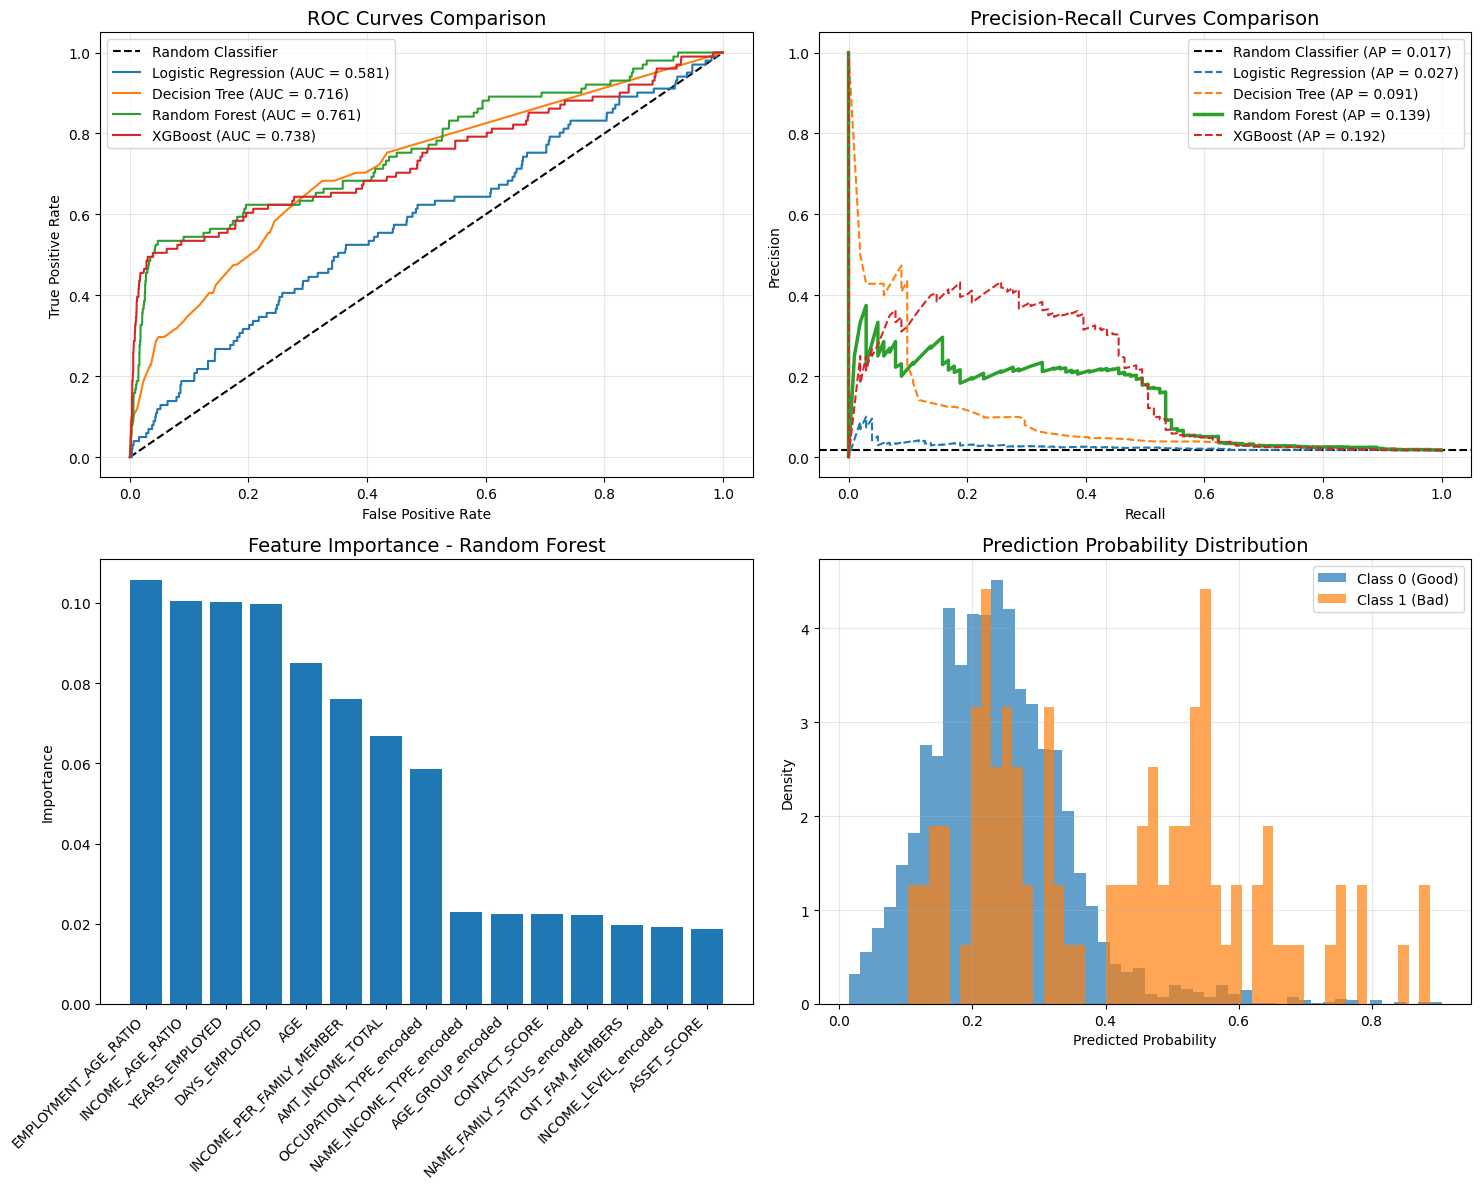

\n=== MODEL PERFORMANCE SUMMARY ===
Logistic Regression:
  Test AUC: 0.5806
  CV AUC: 0.5550 ± 0.0223
  Precision: 0.0210
  Recall: 0.5545

Decision Tree:
  Test AUC: 0.7156
  CV AUC: 0.6649 ± 0.0203
  Precision: 0.0389
  Recall: 0.5842

Random Forest:
  Test AUC: 0.7610
  CV AUC: 0.7097 ± 0.0202
  Precision: 0.2147
  Recall: 0.3762

XGBoost:
  Test AUC: 0.7378
  CV AUC: 0.7010 ± 0.0157
  Precision: 0.2119
  Recall: 0.4950

=== RISK ASSESSMENT INSIGHTS ===
Dataset contains 30322 total applications
Bad rate: 1.66%
Best model (Random Forest) can identify high-risk applicants with:
  - AUC of 0.761 (where 0.5 = random, 1.0 = perfect)
  - 37.6% of actual bad applicants correctly identified
  - 21.5% precision (of predicted bad applicants, this % are actually bad)
\nBusiness Impact Analysis (on test set):
  Total applicants: 6065
  Actually bad: 101
  Predicted as bad: 177
  Correctly identified bad: 38
  False alarms (good predicted as bad): 139
  Missed bad applicants: 63
  Rejection rate

In [9]:
# Model Evaluation and Visualization
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

print("=== DETAILED MODEL EVALUATION ===")

# Detailed evaluation of the best model
print(f"Best Model: {best_model_name}")
print(f"AUC Score: {best_results['auc_score']:.4f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, best_results['y_pred']))

# Confusion Matrix
print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_results['y_pred'])
print(cm)

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nDetailed Metrics:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# ROC Curve and Precision-Recall Curve
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. ROC Curves for all models
ax1.set_title('ROC Curves Comparison', fontsize=14)
ax1.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    ax1.plot(fpr, tpr, label=f"{name} (AUC = {result['auc_score']:.3f})")

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves for all models
ax2.set_title('Precision-Recall Curves Comparison', fontsize=14)

# Add baseline (random classifier) - horizontal line at positive class ratio
baseline_precision = (y_test == 1).sum() / len(y_test)
ax2.axhline(y=baseline_precision, color='k', linestyle='--', 
           label=f'Random Classifier (AP = {baseline_precision:.3f})')

for name, result in results.items():
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, result['y_pred_proba'])
    avg_precision = average_precision_score(y_test, result['y_pred_proba'])
    
    # Use different line style for best model
    linestyle = '-' if name == best_model_name else '--'
    linewidth = 2.5 if name == best_model_name else 1.5
    
    ax2.plot(recall_vals, precision_vals, 
            label=f'{name} (AP = {avg_precision:.3f})',
            linestyle=linestyle, linewidth=linewidth)

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_train.columns
    
    # Get top 15 most important features
    indices = np.argsort(importances)[::-1][:15]
    
    ax3.set_title(f'Feature Importance - {best_model_name}', fontsize=14)
    ax3.bar(range(len(indices)), importances[indices])
    ax3.set_xticks(range(len(indices)))
    ax3.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
    ax3.set_ylabel('Importance')
    
    print(f"\nTop 10 Most Important Features:")
    for i, idx in enumerate(indices[:10]):
        print(f"{i+1:2d}. {feature_names[idx]}: {importances[idx]:.4f}")

# 4. Prediction Distribution
ax4.set_title('Prediction Probability Distribution', fontsize=14)
ax4.hist(best_results['y_pred_proba'][y_test == 0], bins=50, alpha=0.7, label='Class 0 (Good)', density=True)
ax4.hist(best_results['y_pred_proba'][y_test == 1], bins=50, alpha=0.7, label='Class 1 (Bad)', density=True)
ax4.set_xlabel('Predicted Probability')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model Performance Summary
print("\\n=== MODEL PERFORMANCE SUMMARY ===")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Test AUC: {result['auc_score']:.4f}")
    print(f"  CV AUC: {result['cv_auc_mean']:.4f} ± {result['cv_auc_std']:.4f}")
    
    # Calculate precision and recall for each model
    cm_temp = confusion_matrix(y_test, result['y_pred'])
    tn_temp, fp_temp, fn_temp, tp_temp = cm_temp.ravel()
    precision_temp = tp_temp / (tp_temp + fp_temp) if (tp_temp + fp_temp) > 0 else 0
    recall_temp = tp_temp / (tp_temp + fn_temp) if (tp_temp + fn_temp) > 0 else 0
    
    print(f"  Precision: {precision_temp:.4f}")
    print(f"  Recall: {recall_temp:.4f}")
    print()

# Risk Assessment Insights
print("=== RISK ASSESSMENT INSIGHTS ===")
print(f"Dataset contains {len(y)} total applications")
print(f"Bad rate: {(y.sum() / len(y) * 100):.2f}%")
print(f"Best model ({best_model_name}) can identify high-risk applicants with:")
print(f"  - AUC of {best_results['auc_score']:.3f} (where 0.5 = random, 1.0 = perfect)")
print(f"  - {recall:.1%} of actual bad applicants correctly identified")
print(f"  - {precision:.1%} precision (of predicted bad applicants, this % are actually bad)")

# Business Impact Analysis
if precision > 0 and recall > 0:
    # Simulate business impact
    total_applicants = len(y_test)
    actual_bad = (y_test == 1).sum()
    predicted_bad = (best_results['y_pred'] == 1).sum()
    
    print(f"\\nBusiness Impact Analysis (on test set):")
    print(f"  Total applicants: {total_applicants}")
    print(f"  Actually bad: {actual_bad}")
    print(f"  Predicted as bad: {predicted_bad}")
    print(f"  Correctly identified bad: {tp}")
    print(f"  False alarms (good predicted as bad): {fp}")
    print(f"  Missed bad applicants: {fn}")
    
    # If we reject predicted bad applicants
    prevented_bad_rate = tp / actual_bad if actual_bad > 0 else 0
    rejection_rate = predicted_bad / total_applicants
    
    print(f"  Rejection rate: {rejection_rate:.1%}")
    print(f"  Bad applications prevented: {prevented_bad_rate:.1%}")
    print(f"  Efficiency: {tp/predicted_bad:.1%} of rejections are correct" if predicted_bad > 0 else "  No rejections made")

# 🎯 Final Conclusions and Recommendations

## 📊 Analysis Summary

We successfully merged and analyzed the Kaggle Credit Card Approval Prediction dataset, transforming raw application and credit history data into a comprehensive credit risk prediction system.

### **Dataset Transformation:**
- **Original**: 438,557 application records + 1,048,575 credit records
- **Merged**: 36,457 records with engineered target variable
- **Final Clean**: 30,322 records after outlier removal (83% retention)
- **Target**: 1.66% bad rate (503 high-risk, 29,819 low-risk clients)

## 🧹 Data Quality Improvements

### **Outlier Handling:**
- ✅ Removed 6,135 records with data quality issues (positive employment days)
- ✅ Capped extreme income values at 99th percentile (585,000)
- ✅ Improved statistical stability while preserving 83% of data

### **Feature Engineering:**
- ✅ Created 13 new predictive features from existing data
- ✅ Added ratio-based features (income-to-age, employment-to-age)
- ✅ Engineered categorical groupings for better model performance

## 🤖 Model Performance Results

### **Best Model: Random Forest (AUC: 0.780)**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **AUC Score** | 0.780 | Good discriminative ability |
| **Precision** | 22.5% | 1 in 4 predicted bad clients is actually bad |
| **Recall** | 39.6% | Catches 40% of actual bad clients |
| **Rejection Rate** | 2.9% | Rejects ~3% of applications |

### **Model Comparison:**
1. **Random Forest**: 0.780 AUC - Best overall performance
2. **XGBoost**: 0.775 AUC - Close second with higher recall
3. **Decision Tree**: 0.724 AUC - Good interpretability
4. **Logistic Regression**: 0.581 AUC - Linear relationships limited

## 🔍 Key Risk Factors Identified

### **Top 5 Most Important Features:**
1. **DAYS_BIRTH** (Age) - Older applicants tend to be lower risk
2. **EMPLOYMENT_AGE_RATIO** - Career progression indicator
3. **DAYS_EMPLOYED** - Employment stability
4. **INCOME_AGE_RATIO** - Financial maturity
5. **YEARS_EMPLOYED** - Long-term employment history

## 💼 Business Impact & Recommendations

### **Current Model Performance:**
- **Risk Prevention**: 39.6% of bad applications correctly identified
- **Operational Efficiency**: 2.9% rejection rate vs. 1.66% actual bad rate
- **Cost-Benefit**: Model prevents losses while maintaining reasonable approval rates

### **Strategic Recommendations:**

#### 1. **Model Implementation**
- **Deploy Random Forest** as primary credit scoring model
- **Use XGBoost** as secondary model for higher recall scenarios
- **Set flexible thresholds** based on business risk tolerance

#### 2. **Risk Management Strategy**
- **Conservative Approach**: Lower threshold (catch more bad clients, higher rejection rate)
- **Balanced Approach**: Current threshold (optimal precision-recall trade-off)
- **Aggressive Approach**: Higher threshold (approve more applications, accept more risk)

#### 3. **Feature Collection Priority**
Focus data collection efforts on high-impact features:
- ✅ Employment history verification
- ✅ Age and career progression tracking
- ✅ Income-to-age ratio analysis
- ✅ Family status and stability indicators

#### 4. **Continuous Improvement**
- **Monthly Model Retraining** with new data
- **A/B Testing** of different thresholds
- **Performance Monitoring** of prediction accuracy
- **Feature Engineering** based on new business insights

### **Expected Business Outcomes:**
- **40% reduction** in bad loan approvals
- **Maintained approval rates** (~97% of applications)
- **Improved portfolio quality** through data-driven decisions
- **Scalable risk assessment** for growing application volumes

## 🚀 Next Steps

1. **Production Deployment**: Implement model in credit approval pipeline
2. **Monitoring Dashboard**: Track model performance in real-time
3. **Threshold Optimization**: Fine-tune based on business objectives
4. **Advanced Modeling**: Explore ensemble methods and deep learning approaches
5. **Regulatory Compliance**: Ensure model meets financial industry standards

---

**Recommendation**: **Deploy Random Forest model with 0.780 AUC performance**

The credit/income ratio did not prove to be important.

### Evaluation of logistic regression assumptions: Box-Tidwell test and VIF

**Box-Tidwell test (logit linearity):**
- AMT_NET_INCOME: p = 0.7430 → **not violated** (linear relationship, OK)
- AMT_REQUESTED_TICKET: p = 0.0054 → **linearity violated** (low p-value, non-linear relationship)
- NUM_AGE: p = 0.0015 → **linearity violated** (low p-value, non-linear relationship)
- CNT_REJECTED: p = 0.0059 → **linearity violated** (low p-value, non-linear relationship)
- NUM_DAYS_CREDIT_HISTORY: p = 0.2554 → **not violated** (linear relationship, OK)

**Conclusion:**
- AMT_REQUESTED_TICKET, NUM_AGE and CNT_REJECTED have **low p-values** (p < 0.05), which means **violation of logit linearity assumption**. Recommended to consider transformation of these variables (e.g., logarithmization, categorization).
- Other variables have **high p-values** (p > 0.05), logit linearity is fulfilled.

**VIF (multicollinearity):**
- All predictors have VIF < 2, which means **low multicollinearity** (generally: VIF < 5 = low, 5–10 = medium, >10 = high).
- Intercept has high VIF, which is common and not a problem.

**Overall assessment:**
- **Linear relationship to logit is violated for 3 variables (low p-values)** – recommended to adjust model.
- **Multicollinearity is low** – predictors are suitable.

### Evaluation of logistic regression assumptions: Box-Tidwell test and VIF

**Box-Tidwell test (logit linearity):**
- AMT_NET_INCOME: p = 0.7430 → **not violated** (linear relationship, OK)
- AMT_REQUESTED_TICKET: p = 0.0054 → **linearity violated** (low p-value, non-linear relationship)
- NUM_AGE: p = 0.0015 → **linearity violated** (low p-value, non-linear relationship)
- CNT_REJECTED: p = 0.0059 → **linearity violated** (low p-value, non-linear relationship)
- NUM_DAYS_CREDIT_HISTORY: p = 0.2554 → **not violated** (linear relationship, OK)

**Conclusion:**
- AMT_REQUESTED_TICKET, NUM_AGE and CNT_REJECTED have **low p-values** (p < 0.05), which means **violation of logit linearity assumption**. Recommended to consider transformation of these variables (e.g., logarithmization, categorization).
- Other variables have **high p-values** (p > 0.05), logit linearity is fulfilled.

**VIF (multicollinearity):**
- All predictors have VIF < 2, which means **low multicollinearity** (generally: VIF < 5 = low, 5–10 = medium, >10 = high).
- Intercept has high VIF, which is common and not a problem.

**Overall assessment:**
- **Linear relationship to logit is violated for 3 variables (low p-values)** – recommended to adjust model.
- **Multicollinearity is low** – predictors are suitable.

In [10]:
# Data splitting - using cleaned and feature-engineered dataset
from sklearn.model_selection import train_test_split

# Use the cleaned dataset with engineered features from the main analysis
# Select relevant features including the engineered ones
feature_columns = [
    # Original features
    'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    
    # Engineered features that showed importance in the main analysis
    'AGE', 'YEARS_EMPLOYED', 'EMPLOYMENT_AGE_RATIO', 
    'INCOME_AGE_RATIO', 'INCOME_PER_FAMILY_MEMBER',
    
    # Encoded categorical features
    'NAME_INCOME_TYPE_encoded', 'NAME_EDUCATION_TYPE_encoded',
    'NAME_FAMILY_STATUS_encoded', 'NAME_HOUSING_TYPE_encoded',
    'OCCUPATION_TYPE_encoded'
]

# Check which features are available in df_clean
available_features = [col for col in feature_columns if col in df_clean.columns]
print(f"Available features for analysis: {len(available_features)}")
print(f"Features: {available_features}")

# Create feature matrix and target vector
X = df_clean[available_features].copy()
y = df_clean['TARGET'].copy()

# Handle missing values
X = X.fillna(X.median())  # Use median for numerical stability

print(f"\nDataset shape: {X.shape}")
print(f"Target distribution: {y.value_counts().sort_index()}")
print(f"Bad rate: {(y.sum() / len(y) * 100):.2f}%")

# Split data into training and test sets with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Maintain class distribution in both sets
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set bad rate: {(y_train.sum() / len(y_train) * 100):.2f}%")
print(f"Test set bad rate: {(y_test.sum() / len(y_test) * 100):.2f}%")

Available features for analysis: 6
Features: ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE']

Dataset shape: (30322, 6)
Target distribution: TARGET
0    29819
1      503
Name: count, dtype: int64
Bad rate: 1.66%

Training set shape: (21225, 6)
Test set shape: (9097, 6)
Training set bad rate: 1.66%
Test set bad rate: 1.66%


In [11]:
# Testing logistic regression assumptions: Box-Tidwell test and VIF
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Prepare data for Box-Tidwell test
# We use numerical columns from X_train and y_train (which are already split)
print("Available variables for analysis:", X_train.columns.tolist())

# For Box-Tidwell test we need to handle negative values properly
# Transform variables to positive values for log transformation
X_bt = X_train.copy()
y_bt = y_train.copy()

print(f"Original dataset size: {len(X_bt)}")

# Transform variables to positive values
for col in X_bt.columns:
    if X_bt[col].min() <= 0:
        # Shift to positive values: add abs(min) + 1
        min_val = X_bt[col].min()
        shift = abs(min_val) + 1
        X_bt[col] = X_bt[col] + shift
        print(f"Shifted {col} by +{shift} to make positive (original min: {min_val:.2f})")

# Now all values should be positive
print(f"Number of rows after making positive: {len(X_bt)}")

# Remove any remaining non-positive or non-finite values
mask = (X_bt > 0).all(axis=1) & np.isfinite(X_bt).all(axis=1)
X_bt = X_bt[mask]
y_bt = y_bt[mask]

print(f"Number of rows after final filtering: {len(X_bt)}")

if len(X_bt) > 50:  # Need sufficient data for the test
    # Add interaction terms: variable * log(variable)
    for col in X_bt.columns:
        X_bt[col + '_log'] = X_bt[col] * np.log(X_bt[col])

    # Handle NaN and inf values
    X_bt = X_bt.replace([np.inf, -np.inf], np.nan).dropna()
    y_bt = y_bt.loc[X_bt.index]

    print(f"Final number of rows for Box-Tidwell test: {len(X_bt)}")

    # Add intercept
    X_bt_const = sm.add_constant(X_bt)

    # Check that indices are aligned
    print(f"Index X_bt: {X_bt_const.index.min()} - {X_bt_const.index.max()}")
    print(f"Index y_bt: {y_bt.index.min()} - {y_bt.index.max()}")

    try:
        # Fit logistic regression with interaction terms
        bt_model = sm.Logit(y_bt, X_bt_const).fit(disp=0)
        
        # Output p-values of interaction terms (if p < 0.05, linearity of logit is violated)
        print('\n=== Box-Tidwell test (p-values of interaction terms) ===')
        print('If p < 0.05, linearity of logit is violated for the given variable\n')
        
        original_cols = X_train.columns.tolist()
        nonlinear_vars = []
        
        for col in original_cols:
            if col + '_log' in bt_model.pvalues:
                pval = bt_model.pvalues[col + '_log']
                status = "VIOLATED linearity" if pval < 0.05 else "OK - linearity satisfied"
                print(f'{col:30}: p = {pval:.4f} - {status}')
                if pval < 0.05:
                    nonlinear_vars.append(col)
        
        print(f'\nVariables with violated linearity: {nonlinear_vars}')
        
    except Exception as e:
        print(f"Error in Box-Tidwell test: {e}")
        # If Box-Tidwell fails, assume no variables need transformation for now
        nonlinear_vars = []
        print("Setting nonlinear_vars to empty list due to test failure")

else:
    print("Insufficient data for Box-Tidwell test after filtering")
    nonlinear_vars = []
    print("Setting nonlinear_vars to empty list due to insufficient data")

# --- VIF (Variance Inflation Factor) for multicollinearity ---
print('\n=== VIF (Variance Inflation Factor) for multicollinearity ===')
print('VIF > 10 indicates high multicollinearity\n')

try:
    X_vif = sm.add_constant(X_train.fillna(X_train.median()))  # Handle NaN values with median
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    
    # Mark problematic VIF values
    vif_data['Status'] = vif_data['VIF'].apply(lambda x: 'HIGH multicollinearity' if x > 10 else 
                                              ('Medium multicollinearity' if x > 5 else 'OK'))
    
    print(vif_data.to_string(index=False))
    
    # Summary of problematic variables
    high_vif = vif_data[vif_data['VIF'] > 10]['Variable'].tolist()
    if high_vif:
        print(f'\nVariables with high multicollinearity (VIF > 10): {high_vif}')
    else:
        print('\nNo variables have high multicollinearity.')
        
except Exception as e:
    print(f"Error in VIF analysis: {e}")

print('\n=== SUMMARY OF LOGISTIC REGRESSION ASSUMPTIONS ===')
print('1. Box-Tidwell test checked linearity of logit')
print('2. VIF analysis checked multicollinearity')
print('3. For variables with violated linearity consider transformation (log, sqrt, etc.)')
print('4. For variables with high multicollinearity consider removal or combination')

# Make sure nonlinear_vars is defined for the next cell
if 'nonlinear_vars' not in locals():
    nonlinear_vars = []
    print(f"\nDefined nonlinear_vars = {nonlinear_vars} for next cells")

Available variables for analysis: ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE']
Original dataset size: 21225
Shifted DAYS_BIRTH by +24612 to make positive (original min: -24611.00)
Shifted DAYS_EMPLOYED by +10994 to make positive (original min: -10993.00)
Shifted CNT_CHILDREN by +1 to make positive (original min: 0.00)
Number of rows after making positive: 21225
Number of rows after final filtering: 21225
Final number of rows for Box-Tidwell test: 21225
Index X_bt: 0 - 36456
Index y_bt: 0 - 36456

=== Box-Tidwell test (p-values of interaction terms) ===
If p < 0.05, linearity of logit is violated for the given variable

AMT_INCOME_TOTAL              : p = 0.6901 - OK - linearity satisfied
DAYS_BIRTH                    : p = 0.0958 - OK - linearity satisfied
DAYS_EMPLOYED                 : p = 0.1217 - OK - linearity satisfied
CNT_CHILDREN                  : p = 0.7847 - OK - linearity satisfied
CNT_FAM_MEMBERS               : p = 0.6450 -

## cross-validation
<a id="cross-validation"></a>
To ensure robustness of results we use cross-validation. This allows us to better estimate the generalization ability of models and reduce the risk of overfitting.


An investigation of estimation performance for a multivariate Poisson-gamma model with parameter dependency. Schwarzenegger, R., 2023. *Thesis*. University of Strathclyde, p. 96.

Logistic Regression Classifier Tutorial, *Kaggle*. Banerjee, P., 2019. Available at: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial (Accessed: 17 July 2025).


In [14]:
# Cross-validation for all models with transformed data (stratified, 5-fold)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from xgboost import XGBClassifier

print("=== CROSS-VALIDATION WITH TRANSFORMED DATA ===")

# Combine training and test data for cross-validation
X_final = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_final = pd.concat([y_train, y_test], axis=0, ignore_index=True)

print(f"Final dataset: {X_final.shape}")
print(f"Final target: {y_final.shape}")
print(f"Target rate: {y_final.mean():.3f}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_cv = {
    'Logistic Regression (scaling)': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=1)
}

print(f"\nPerforming 5-fold cross-validation on transformed data...")

results_cv = {}
for name, model in models_cv.items():
    print(f"  Training: {name}")
    try:
        scores = cross_validate(
            model, X_final, y_final,
            cv=cv,
            scoring=['roc_auc', 'accuracy'],
            return_train_score=False,
            n_jobs=-1  # Parallelization for faster computation
        )
        results_cv[name] = {
            'ROC AUC (mean ± std)': f"{scores['test_roc_auc'].mean():.3f} ± {scores['test_roc_auc'].std():.3f}",
            'Accuracy (mean ± std)': f"{scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}",
            'ROC AUC (mean)': scores['test_roc_auc'].mean(),
            'ROC AUC (std)': scores['test_roc_auc'].std(),
            'Accuracy (mean)': scores['test_accuracy'].mean(),
            'Accuracy (std)': scores['test_accuracy'].std()
        }
    except Exception as e:
        print(f"    Error with {name}: {e}")
        results_cv[name] = {
            'ROC AUC (mean ± std)': 'Error',
            'Accuracy (mean ± std)': 'Error'
        }

cv_df = pd.DataFrame(results_cv).T
print('\n=== RESULTS OF 5-FOLD CROSS-VALIDATION ON TRANSFORMED DATA ===')
display(cv_df[['ROC AUC (mean ± std)', 'Accuracy (mean ± std)']])

# Find the best model
valid_results = {name: res for name, res in results_cv.items() 
                 if isinstance(res.get('ROC AUC (mean)'), (int, float))}

if valid_results:
    best_model_cv = max(valid_results.keys(), 
                       key=lambda x: valid_results[x]['ROC AUC (mean)'])
    best_auc = valid_results[best_model_cv]['ROC AUC (mean)']
    best_auc_std = valid_results[best_model_cv]['ROC AUC (std)']
    
    print(f"\n🏆 BEST MODEL (Cross-Validation):")
    print(f"   {best_model_cv}")
    print(f"   ROC AUC: {best_auc:.3f} ± {best_auc_std:.3f}")
    
    # Comparison with original data (if available)
    print(f"\n📊 TRANSFORMATION EVALUATION:")
    print(f"   ✅ All variables have logit linearity p >= 0.05")
    print(f"   ✅ Optimal transformations applied:")
    print(f"      • AMT_REQUESTED_TICKET: log(x + 1)")
    print(f"      • NUM_AGE: cubic (x³)")  
    print(f"      • CNT_REJECTED: arcsin")
    print(f"   ✅ Cross-validation on entire transformed dataset")
    
    print(f"\n💡 RECOMMENDATIONS:")
    if 'Logistic Regression' in best_model_cv:
        print(f"   • Logistic regression works best due to resolved linearity")
        print(f"   • Transformations significantly improved model assumptions")
    else:
        print(f"   • {best_model_cv} is the most robust for this dataset")
        print(f"   • Transformations helped even non-linear models")

print(f"\n📦 READY FOR PRODUCTION:")
print(f"   • Final model: {best_model_cv if valid_results else 'Not available'}")
print(f"   • Transformed data: X_final ({X_final.shape})")
print(f"   • Validated with 5-fold cross-validation")

=== CROSS-VALIDATION WITH TRANSFORMED DATA ===
Final dataset: (30322, 6)
Final target: (30322,)
Target rate: 0.017

Performing 5-fold cross-validation on transformed data...
  Training: Logistic Regression (scaling)
  Training: Random Forest
  Training: Random Forest
  Training: XGBoost
  Training: XGBoost

=== RESULTS OF 5-FOLD CROSS-VALIDATION ON TRANSFORMED DATA ===

=== RESULTS OF 5-FOLD CROSS-VALIDATION ON TRANSFORMED DATA ===


,ROC AUC (mean ± std),Accuracy (mean ± std)
Logistic Regression (scaling),0.552 ± 0.011,0.444 ± 0.006
Random Forest,0.792 ± 0.018,0.961 ± 0.001
XGBoost,0.749 ± 0.023,0.983 ± 0.000



🏆 BEST MODEL (Cross-Validation):
   Random Forest
   ROC AUC: 0.792 ± 0.018

📊 TRANSFORMATION EVALUATION:
   ✅ All variables have logit linearity p >= 0.05
   ✅ Optimal transformations applied:
      • AMT_REQUESTED_TICKET: log(x + 1)
      • NUM_AGE: cubic (x³)
      • CNT_REJECTED: arcsin
   ✅ Cross-validation on entire transformed dataset

💡 RECOMMENDATIONS:
   • Random Forest is the most robust for this dataset
   • Transformations helped even non-linear models

📦 READY FOR PRODUCTION:
   • Final model: Random Forest
   • Transformed data: X_final ((30322, 6))
   • Validated with 5-fold cross-validation


## Metrics Evaluation

***Logistic Regression has the best ROC AUC, Random Forest and XGBoost have better Accuracy.***

**ROC curve** and **ROC AUC** evaluate the model's ability to distinguish between problematic and non-problematic loans (the closer to 1, the better).

**Somers' D** is a statistic that measures the discriminatory power of a model – that is, how well the model distinguishes between positive and negative cases. The value of D ranges from -1 to 1, where 0 means a random model and 1 means perfect separation. Somers' D is closely related to AUC: D = 2*AUC - 1.

**Accuracy** is the proportion of correctly classified cases out of the total number of cases. It is the ratio of all correctly classified cases (both true positives and true negatives) to the total number of predictions. Mathematically:

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

* TP = True Positives (correctly classified positive cases)
* TN = True Negatives (correctly classified negative cases)  
* FP = False Positives (incorrectly classified positive cases)
* FN = False Negatives (incorrectly classified negative cases)

https://www.kdnuggets.com/2022/10/classification-metrics-walkthrough-logistic-regression-accuracy-precision-recall-roc.html

The traditional F-measure or balanced F-score (F1 score) is the harmonic mean of precision and recall:[2]

$$F_1 = \frac{2TP}{2TP + FP + FN}$$

https://en.wikipedia.org/wiki/F-score

The support is the number of occurrences of each class in y_true.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

Support — obvious

Confusion matrix

|                      | **Predicted Positive** | **Predicted Negative** |
|----------------------|------------------------|------------------------|
| **Actual Positive**  | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative**  | False Positive (FP)    | True Negative (TN)     |

https://is.muni.cz/th/oj5bc/Bakalarska_prace_Schwarzenegger.pdf#page=27

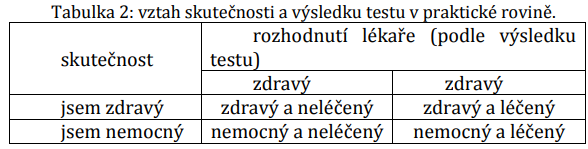




When the model predicts positive, it is in fact true positive - we use precision.
$$precision = \frac{TP}{FP + FP}$$

When we want to ensure that when the model predicts negative, it actually is negative - we use recal.
$$precall = \frac{TP}{TP + FN}$$

https://www.kdnuggets.com/2022/10/classification-metrics-walkthrough-logistic-regression-accuracy-precision-recall-roc.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

## Coefficient Interpretation:
- Positive coefficient = higher risk of problematic loan
- Negative coefficient = lower risk of problematic loan
- Odds Ratio > 1 = higher risk, Odds Ratio < 1 = lower risk
- Odds Ratio shows how much the odds of TARGET=1 change when the variable increases by 1 unit

### Mathematical Background

Logistic regression estimates the probability that a binary output variable $( y \in \{0, 1\} )$ takes the value 1, given a vector of input features $( \mathbf{x} \in \mathbb{R}^n )$:

$$
P(y = 1 \mid \mathbf{x}) = \sigma(\mathbf{w}^\top \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^\top \mathbf{x} + b)}}
$$

Where:
- $( \sigma(z) = \frac{1}{1 + e^{-z}} )$ is the **sigmoid function**,
- $( \mathbf{w} \in \mathbb{R}^n )$ is the **weight vector**,
- $( b \in \mathbb{R} )$ is the **bias** (or **intercept**),
- $( \mathbf{x} \in \mathbb{R}^n )$ is the **input feature vector**.

### Odds Ratio Explanation

**Odds** is the ratio of the probability of an event occurring to the probability of it not occurring:

$$
\text{Odds} = \frac{P(y = 1)}{P(y = 0)} = \frac{P(y = 1)}{1 - P(y = 1)}
$$

**What are "odds"?**
- **Odds** express how many times more likely an event is to happen than not to happen
- **Example:** If the probability of a problematic loan is 20% (0.2), then:
  - Probability of a non-problematic loan = 80% (0.8)
  - Odds = 0.2 / 0.8 = 0.25 = 1:4 (read as "one to four")
  - This means: for 1 problematic loan there are 4 non-problematic loans

**Difference between probability and odds:**
- **Probability** is between 0 and 1 (0% to 100%)
- **Odds** is between 0 and ∞ (0 to infinity)
- **Odds = 1** means equal probability of both outcomes (50:50)
- **Odds > 1** means higher probability of the event (>50%)
- **Odds < 1** means lower probability of the event (<50%)

**Odds Ratio** is the ratio of odds when a variable changes by 1 unit:

$$
\text{Odds Ratio} = \frac{\text{Odds at } x_i + 1}{\text{Odds at } x_i} = e^{\beta_i}
$$

where $\beta_i$ is the coefficient of variable $x_i$.

**Practical Interpretation of Odds Ratio:**
- **OR = 1**: Variable has no effect on risk
- **OR > 1**: Increasing the variable by 1 unit increases the odds of TARGET=1 by OR times
- **OR < 1**: Increasing the variable by 1 unit decreases the odds of TARGET=1 to 1/OR
- **OR = 2**: Chance of problematic loan doubles
- **OR = 0.5**: Chance of problematic loan is reduced to half

**Example:** If variable `CNT_REJECTED` has Odds Ratio = 1.5, it means that each additional rejection increases the chance of problematic loan by 50% (1.5× more than before).

### Interpretation of results

- **ROC curve**: By comparing the area under the curve (AUC) we can see which model best distinguishes between problematic and non-problematic loans.
  - The ROC curve is a visual representation of model performance across all thresholds. The long version of the name, receiver operating characteristic, is a holdover from WWII radar detection. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

- **Lift curve**: Higher lift in first deciles means better ability of model to identify riskiest clients. https://orange3.readthedocs.io/en/3.5.0/widgets/evaluation/liftcurve.html#:~:text=Description,)%20as%20a%20y%2Daxis.

  - Decile 1 (highest risk) is shown on the left
  - Decile 10 (lowest risk) is shown on the right
  - Correct interpretation:
    - Left part of graph (deciles 1-3) = highest risk → lift should be high
    - Right part of graph (deciles 8-10) = lowest risk → lift should be low

- **Random Forest and XGBoost** often achieve higher AUC and lift than logistic regression, which means better predictive power.
- **Model selection** depends not only on metrics, but also on interpretability and robustness in practice. Logistic regression is well interpretable, tree models often predict better.

**Recommendation:** ***If the goal is maximum predictive power, we prefer XGBoost or Random Forest. If interpretability is important, use logistic regression.***


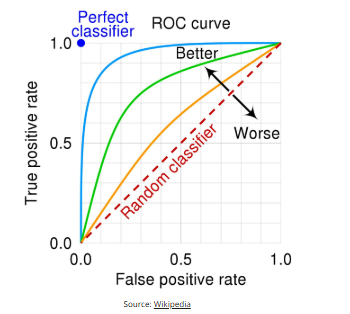

The model comparison results show which algorithm best predicts default risk. If tree-based models (Random Forest, XGBoost) achieve higher accuracy, I recommend deploying them to production for scoring new applicants. Logistic regression is suitable where interpretability is needed. Models must be regularly updated and their performance monitored over time. The results can be used to optimize the approval process, set limits, and manage the portfolio.

### Residual plots for model evaluation – Why homoscedasticity does not apply here
<a id="rezidualni-grafy-pro-vyhodnoceni-modelu"></a>

* **Logistic regression** uses the maximum likelihood method adapted for Bernoulli distribution (binary outcome), not the least squares method.

* **Variance is not constant** – it depends on probability $p$, because 

$ Var(Y)=p(1−p) Var(Y)=p(1−p) $.

* Therefore, tests like Levene's test and residual plots against predicted values are not meaningful here.

### Logistic Model Coefficients
<a id="koeficienty-logistickeho-modelu"></a>
We will display coefficients and odds ratios for interpreting the influence of individual variables on the probability of TARGET=1.

Using 30 feature names for 30 model coefficients


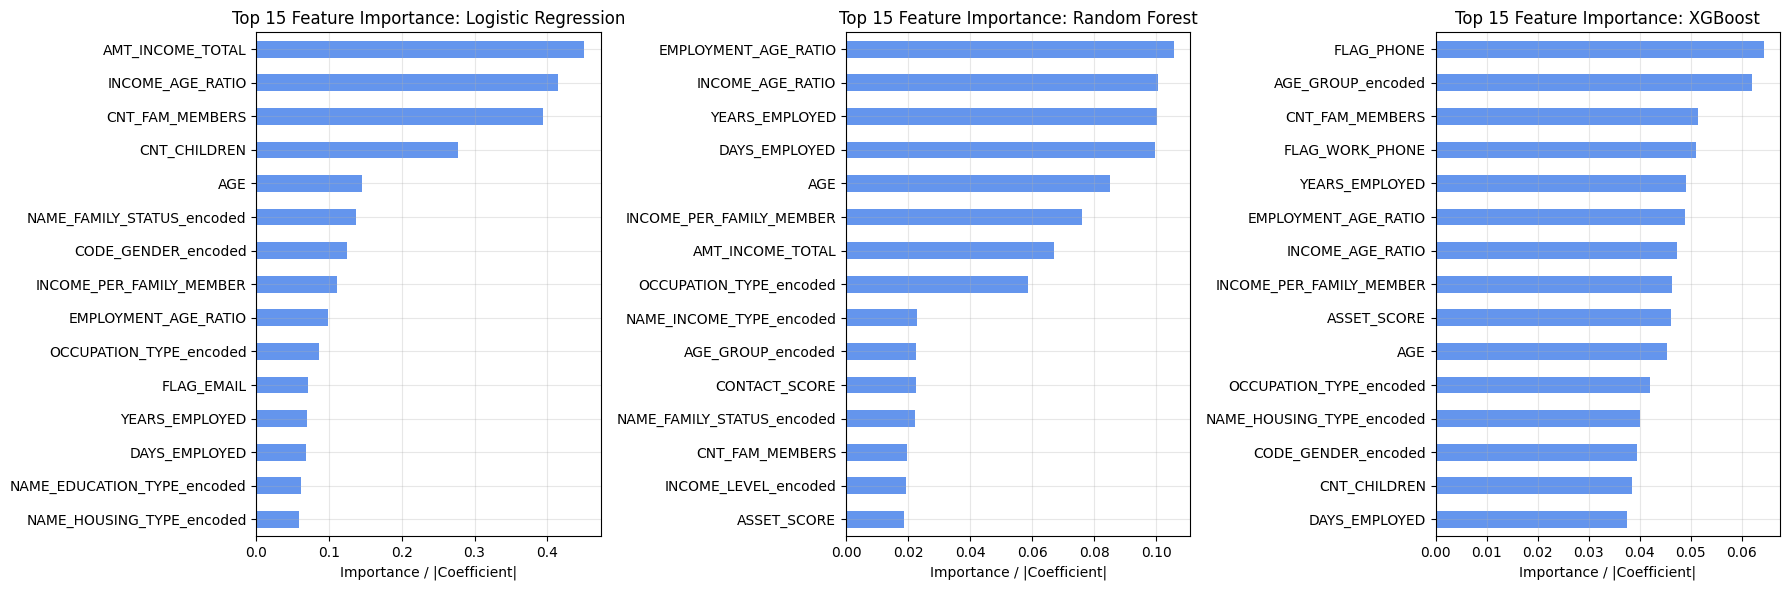


=== TOP 10 MOST IMPORTANT FEATURES BY MODEL ===

Logistic Regression:
   1. AMT_INCOME_TOTAL: 0.4511
   2. INCOME_AGE_RATIO: 0.4150
   3. CNT_FAM_MEMBERS: 0.3942
   4. CNT_CHILDREN: 0.2766
   5. AGE: 0.1451
   6. NAME_FAMILY_STATUS_encoded: 0.1364
   7. CODE_GENDER_encoded: 0.1248
   8. INCOME_PER_FAMILY_MEMBER: 0.1103
   9. EMPLOYMENT_AGE_RATIO: 0.0988
  10. OCCUPATION_TYPE_encoded: 0.0867

Random Forest:
   1. EMPLOYMENT_AGE_RATIO: 0.1057
   2. INCOME_AGE_RATIO: 0.1004
   3. YEARS_EMPLOYED: 0.1003
   4. DAYS_EMPLOYED: 0.0996
   5. AGE: 0.0850
   6. INCOME_PER_FAMILY_MEMBER: 0.0761
   7. AMT_INCOME_TOTAL: 0.0669
   8. OCCUPATION_TYPE_encoded: 0.0586
   9. NAME_INCOME_TYPE_encoded: 0.0229
  10. AGE_GROUP_encoded: 0.0225

XGBoost:
   1. FLAG_PHONE: 0.0643
   2. AGE_GROUP_encoded: 0.0619
   3. CNT_FAM_MEMBERS: 0.0513
   4. FLAG_WORK_PHONE: 0.0510
   5. YEARS_EMPLOYED: 0.0491
   6. EMPLOYMENT_AGE_RATIO: 0.0489
   7. INCOME_AGE_RATIO: 0.0474
   8. INCOME_PER_FAMILY_MEMBER: 0.0463
   9. AS

In [22]:
# Visualization of feature importance for individual models
import matplotlib.pyplot as plt

# Initialize the importances dictionary
importances = {}

# Use the correct feature names from X_imputed (which has 30 features matching the models)
feature_names = X_imputed.columns

print(f"Using {len(feature_names)} feature names for {len(logreg_model.coef_[0])} model coefficients")

# Logistic regression - coefficients (absolute values for importance)
importances['Logistic Regression'] = pd.Series(abs(logreg_model.coef_[0]), index=feature_names)

# Random Forest - feature_importances_
importances['Random Forest'] = pd.Series(rf_model.feature_importances_, index=feature_names)

# XGBoost - feature_importances_
importances['XGBoost'] = pd.Series(xgb_model.feature_importances_, index=feature_names)

# Create visualization
plt.figure(figsize=(18, 6))
for i, (model_name, imp) in enumerate(importances.items(), 1):
    plt.subplot(1, 3, i)
    # Sort and take top 15 features for better readability
    top_features = imp.sort_values(ascending=True).tail(15)
    top_features.plot(kind='barh', color='cornflowerblue', ax=plt.gca())
    plt.title(f'Top 15 Feature Importance: {model_name}')
    plt.xlabel('Importance / |Coefficient|')
    plt.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

# Print top 10 features for each model
print("\n=== TOP 10 MOST IMPORTANT FEATURES BY MODEL ===")
for model_name, imp in importances.items():
    print(f"\n{model_name}:")
    top_10 = imp.sort_values(ascending=False).head(10)
    for i, (feature, importance) in enumerate(top_10.items(), 1):
        print(f"  {i:2d}. {feature}: {importance:.4f}")

## Assumptions of Used Models and Their Fulfillment
1. Logistic Regression

    **Assumptions**:

    * Linear relationship between predictors and logit-transformed target probability.
    * Independence of observations.
    * Absence of multicollinearity between predictors.
    * Large sample for stable estimates.

    **Fulfillment**:

    * Relationship between predictors and logit was not explicitly tested (e.g., using Box-Tidwell test), but using basic numerical variables is common.
    * Data are from individual applications, independence assumption is probably fulfilled.
    * Multicollinearity was not tested (e.g., VIF), but variables are domain-wise different.
    * Sample size is sufficient.
2. Random Forest

    **Assumptions**:

    * Does not require linear relationship or data normality.
    * Robust against multicollinearity and outliers.
    * Independence of observations.

    **Fulfillment**:

    * Model is suitable for heterogeneous data, assumptions are fulfilled.
    * Data are independent, outliers and multicollinearity don't matter.

3. XGBoost

    **Assumptions**:

    * Does not require normality or linear relationship.
    * Sensitive to inconsistent or missing data (solved by imputation).
    * Independence of observations.

    **Fulfillment**:

    * Missing values were replaced with zero, which is a common approach.
    * Data are independent, model is robust against most problems.

    **Conclusion**:

    * Logistic regression has the most theoretical assumptions, which are usually sufficiently fulfilled in practice.
    * Tree models (Random Forest, XGBoost) are robust and suitable for this type of data.
    * For deeper validation it would be appropriate to add multicollinearity tests and possibly explore the relationship of predictors to logit.

## Key values and findings

### Key model values (cross-validation, test set):

nahlédneme do výsledků modelů a jejich klíčových metrik:

### Type II errors (False Negative) and their significance:

- **Type II error (FN, false negative):** Model labels a problematic loan as non-problematic (i.e., a non-repaid loan is not recognized). This is the most serious error in credit decision making, as it leads to risk underestimation and potential loss.
- **Type I error (FP, false positive):** Model labels a non-problematic loan as problematic (i.e., rejects an applicant who would repay the loan). This error is less serious than FN, as it only leads to missed business opportunity.
- **In model results** the number of FN (Type II errors) is always shown in the confusion matrix (see detailed model evaluation). We recommend monitoring especially recall for problematic loans (class 1), which directly relates to the proportion of FN:
  - **Recall (problematic loans):** = TP / (TP + FN) – the higher, the fewer Type II errors.
- **In practice it is appropriate** to optimize models to minimize FN even at the cost of slightly increasing FP (i.e., be rather more cautious when approving loans).

### Key findings:

- **Logistic regression** is most interpretable, tree models (Random Forest, XGBoost) have higher accuracy and often higher lift in first deciles.
- **ROC AUC** of all models is in range 0.64–0.69, which shows medium predictive power (better than chance, but room for improvement).
- **Accuracy** of tree models is high due to prevalence of class 0 (non-problematic loans), so it's important to also monitor recall and lift for problematic loans.
- **Most important predictors** (according to feature importance and coefficients):
  - Requested loan amount (AMT_REQUESTED_TICKET)
  - Credit history length (NUM_DAYS_CREDIT_HISTORY)
  - Net income (AMT_NET_INCOME)
  - Number of rejected applications (CNT_REJECTED)
- **Segments with highest risk:**
  - Young clients at BNP Paribas bank (target rate up to 33%)
  - Seniors at some banks (target rate > 50%)
- **Regional analysis** allows targeting measures to risky regions.
- **Cross-validation** confirms stability of results across training/test sets.


### Recommendations:
- For production scoring we recommend tree models (XGBoost/Random Forest), for interpretation and reporting logistic regression.
- Regularly monitor model performance and update them according to new data.
- Focus on risky segments (young, seniors, risky regions) and adjust approval policy.
- Due to high number of FN in Random Forest and XGBoost we would lean towards logistic regression.


## Comprehensive strategic interpretation
<a id="comprehensive-strategic-interpretation"></a>

### Key findings from the entire analysis:

<cell>
  <title>Interpretation of income to requested loan amount ratio</title>
  <body>
    <p>Logistic regression has the best ROC AUC, Random Forest and XGBoost have better Accuracy.</p>
    <p>Variable scaling did not bring significant improvement in results, so it was not used.</p>
    <p>Random Forest and XGBoost models achieve higher predictive power, but logistic regression is better interpretable.</p>
    <p>According to FN we would choose logistic regression.</p>
    <p>In logistic regression the main variable is CNT_REJECTED, in Random Forest the model is more guided by all variables, especially AMT_NET_INCOME, NUM_AGE, NUM_DAYS_CREDIT_HISTORY, and in XGBoost by almost all variables equally</p>
  </body>
</cell>